# Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

## ETL

In [3]:
# Estrazione dei dati
file = 'Crime_Data_from_2020_to_Present.csv'
crime = pd.read_csv(file)
print(crime)

             DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130   
1        200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800   
2        200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700   
3        200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037   
4        200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630   
...            ...                     ...                     ...       ...   
1003443  240710284  07/24/2024 12:00:00 AM  07/23/2024 12:00:00 AM      1400   
1003444  240104953  01/15/2024 12:00:00 AM  01/15/2024 12:00:00 AM       100   
1003445  240410786  10/14/2024 12:00:00 AM  10/11/2024 12:00:00 AM      2330   
1003446  240309674  04/24/2024 12:00:00 AM  04/24/2024 12:00:00 AM      1500   
1003447  240910892  08/13/2024 12:00:00 AM  08/12/2024 12:00:00 AM      2300   

         AREA   AREA NAME  Rpt Dist No 

In [8]:
crime. isnull().sum()
crime.dropna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
49169,200613424,08/02/2020 12:00:00 AM,08/02/2020 12:00:00 AM,2030,6,Hollywood,657,1,761,BRANDISH WEAPON,...,AO,Adult Other,761.0,920.0,930.0,998.0,WESTERN,ROMAINE,34.0885,-118.3092
142047,201904032,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2135,19,Mission,1924,1,761,BRANDISH WEAPON,...,AA,Adult Arrest,761.0,930.0,997.0,998.0,ASTORIA ST,SAN FERNANDO RD,34.2949,-118.4571
363763,210617136,10/08/2021 12:00:00 AM,10/07/2021 12:00:00 AM,1950,6,Hollywood,659,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,210.0,910.0,998.0,NORMANDIE,DE LONGPRE,34.0966,-118.3005
372515,210209196,05/08/2021 12:00:00 AM,05/08/2021 12:00:00 AM,230,2,Rampart,279,1,210,ROBBERY,...,AO,Adult Other,210.0,510.0,910.0,998.0,JAMES M WOOD,GREEN,34.0503,-118.2720
490083,220600626,04/27/2022 12:00:00 AM,04/23/2022 12:00:00 AM,2300,6,Hollywood,646,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,IC,Invest Cont,230.0,821.0,910.0,998.0,SELMA,LAS PALMAS,34.0997,-118.3363
537825,221718232,12/25/2022 12:00:00 AM,12/25/2022 12:00:00 AM,1150,17,Devonshire,1797,1,122,"RAPE, ATTEMPTED",...,AA,Adult Arrest,122.0,230.0,910.0,998.0,PARTHENIA ST,HAYVENHURST,34.2285,-118.4939
585975,221401314,11/10/2022 12:00:00 AM,11/10/2022 12:00:00 AM,2117,14,Pacific,1452,2,910,KIDNAPPING,...,IC,Invest Cont,812.0,860.0,910.0,998.0,WASHINGTON,SPEEDWAY,33.9792,-118.4666
728535,231717599,11/15/2023 12:00:00 AM,11/15/2023 12:00:00 AM,400,17,Devonshire,1738,1,210,ROBBERY,...,IC,Invest Cont,210.0,230.0,761.0,998.0,HASKELL AV,SAN FERNANDO BL,34.2692,-118.4789
809392,231915572,10/21/2023 12:00:00 AM,10/21/2023 12:00:00 AM,1,19,Mission,1902,1,210,ROBBERY,...,AA,Adult Arrest,210.0,250.0,761.0,998.0,POLK,BORDEN,34.3103,-118.4467
934032,241905348,02/04/2024 12:00:00 AM,02/03/2024 12:00:00 AM,1100,19,Mission,1983,1,820,ORAL COPULATION,...,AO,Adult Other,761.0,820.0,910.0,998.0,BURNET,PARTHENIA,34.2282,-118.4633


In [11]:
# 2. Trasformazione (Transform)
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], errors='coerce')
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], errors='coerce')
crime_2020_2023 = crime[(crime['DATE OCC'].dt.year >= 2020) & (crime['DATE OCC'].dt.year <= 2023)]
crime_2020_2023 = crime[(crime['Date Rptd'].dt.year >= 2020) & (crime['Date Rptd'].dt.year <= 2023)]

# a. Gestione delle colonne di data (Date Rptd, DATE OCC)
#crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
#crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# b. Gestione delle colonne di tipo di crimine e classificazione
crime['Crm Cd Desc'] = crime['Crm Cd Desc'].str.strip()  # Rimuove gli spazi extra
crime['Crm Cd'] = crime['Crm Cd'].astype('category')

# c. Gestione della classificazione del crimine (grave o meno grave)
crime['Part 1-2'] = crime['Part 1-2'].map({1: 'Grave', 2: 'Minore'})
crime['Part 1-2'] = crime['Part 1-2']

# d. Gestione delle colonne di latitudine e longitudine (per controllare dati inconsistenti)
crime['LAT'] = pd.to_numeric(crime['LAT'], errors='coerce')
crime['LON'] = pd.to_numeric(crime['LON'], errors='coerce')

# e. Gestione delle colonne di vittima (età, sesso, etnia)
crime['Vict Age'] = pd.to_numeric(crime['Vict Age'], errors='coerce')
crime['Vict Sex'] = crime['Vict Sex'].replace({'H': 'Altro', '-': 'Altro', 'X': 'Altro'})
crime['Vict Descent'] = crime['Vict Descent']

# f. Gestione dello stato del crimine (Status)
crime['Status'] = crime['Status'].str.strip()

# g. Gestione della località (LOCATION)
crime['LOCATION'] = crime['LOCATION'].str.strip()

# h. Rimozione di righe duplicate
crime = crime.drop_duplicates()

# i. Creazione di una nuova colonna "Criminal Activity Duration" in giorni
crime['Criminal Activity Duration'] = (crime['Date Rptd'] - crime['DATE OCC']).dt.days

# j. Creazione di una colonna di "Active Status" in base alla colonna 'Status'
crime['Active Status'] = np.where(crime['Status'] == 'Closed', 'Inactive', 'Active')


C:\Users\gabri\AppData\Local\Temp\ipykernel_30080\1345215932.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'], errors='coerce')


In [ ]:
# Assicurati che la colonna 'DATE OCC' sia di tipo datetime
crime_2020_2023['DATE OCC'] = pd.to_datetime(crime_2020_2023['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Filtra i dati per includere solo quelli del 2024
crime_2020 = crime_2020_2023[crime_2020_2023['DATE OCC'].dt.year == 2020]

# Stampa i dati relativi al 2024
print(crime_2020)

            DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA   AREA NAME  \
0       190326475 2020-03-01 2020-03-01      2130     7    Wilshire   
1       200106753 2020-02-09 2020-02-08      1800     1     Central   
2       200320258 2020-11-11 2020-11-04      1700     3   Southwest   
3       200907217 2023-05-10 2020-03-10      2037     9    Van Nuys   
4       200412582 2020-09-09 2020-09-09       630     4  Hollenbeck   
...           ...        ...        ...       ...   ...         ...   
199854  240317069 2024-12-16 2020-04-16      1350     3   Southwest   
199855  201115217 2020-10-29 2020-07-07      1400    11   Northeast   
199856  242113813 2024-12-18 2020-09-01       900    21     Topanga   
199857  240605846 2024-02-06 2020-06-20         1     6   Hollywood   
199858  242014110 2024-12-18 2020-11-17      1320    20     Olympic   

        Rpt Dist No Part 1-2 Crm Cd  \
0               784  Unknown    510   
1               182  Unknown    330   
2               356  Unknown  

In [12]:
# Assicurati che la colonna 'DATE OCC' sia di tipo datetime
crime_2020_2023['DATE OCC'] = pd.to_datetime(crime_2020_2023['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Filtra i dati per includere solo quelli del 2024
crime_2024 = crime_2020_2023[crime_2020_2023['DATE OCC'].dt.year == 2024]

# Stampa i dati relativi al 2024
print(crime_2024)

Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Part 1-2, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Cd, Premis Desc, Weapon Used Cd, Weapon Desc, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, LOCATION, Cross Street, LAT, LON]
Index: []

[0 rows x 28 columns]


## Analisi Dataset

In [7]:
crime.shape
crime.dtypes

DR_NO                                  int64
Date Rptd                     datetime64[ns]
DATE OCC                      datetime64[ns]
TIME OCC                               int64
AREA                                   int64
AREA NAME                             object
Rpt Dist No                            int64
Part 1-2                              object
Crm Cd                              category
Crm Cd Desc                           object
Mocodes                               object
Vict Age                               int64
Vict Sex                              object
Vict Descent                          object
Premis Cd                            float64
Premis Desc                           object
Weapon Used Cd                       float64
Weapon Desc                           object
Status                                object
Status Desc                           object
Crm Cd 1                             float64
Crm Cd 2                             float64
Crm Cd 3  

In [8]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Criminal Activity Duration', 'Active Status'],
      dtype='object')

## Analisi descrittiva e visualizzazione del Dataset

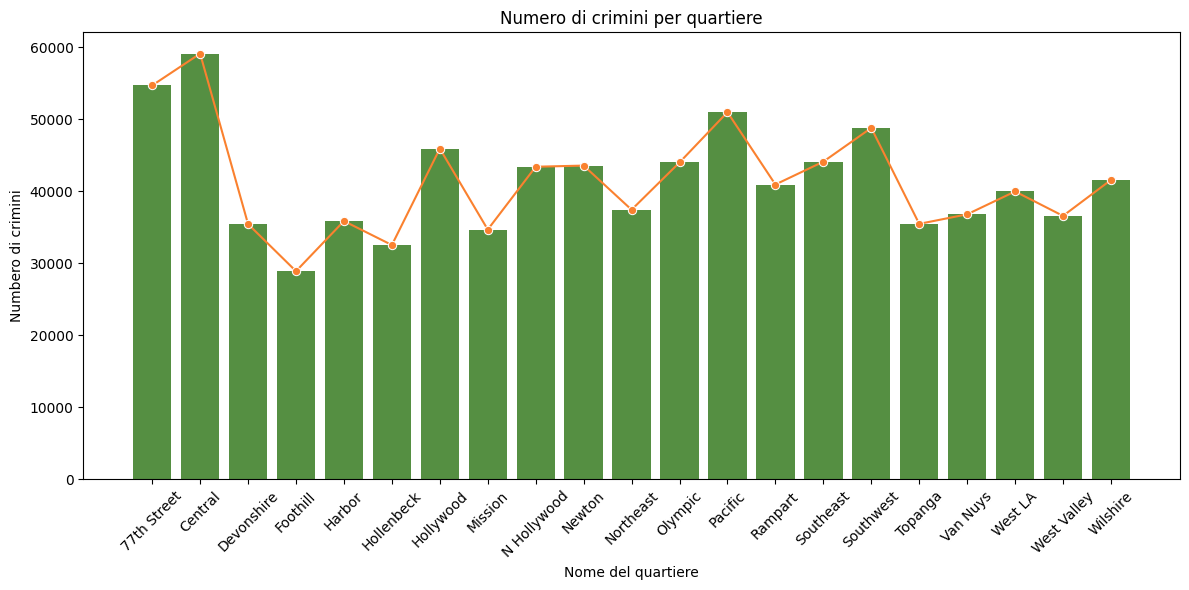

In [13]:
# Crimini distribuiti per area
crime_counts = crime_2020_2023.groupby('AREA NAME')['DR_NO'].count().reset_index()
crime_counts.columns = ['AREA NAME', 'Crime Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='Crime Count', data=crime_counts, color='#4e9c35')
sns.lineplot(x='AREA NAME', y='Crime Count', data=crime_counts, marker='o', color='#FA812F')

plt.title('Numero di crimini per quartiere')
plt.xlabel('Nome del quartiere')
plt.ylabel('Numbero di crimini')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


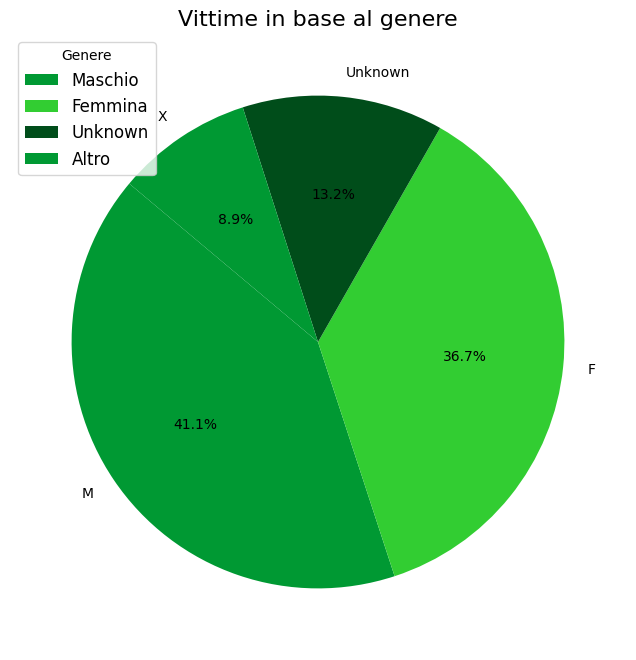

In [28]:
# Crimini in base al sesso
gender_counts = crime_2020_2023['Vict Sex'].value_counts()

plt.figure(figsize=(8, 8))

# Grafico a torta
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['#009933', '#32CD32', '#004d1a'])

# Titolo
plt.title('Vittime in base al genere', fontsize=16)

# Aggiungere la legenda
gender_meanings = {'M': 'Maschio', 'F': 'Femmina', 'X': 'Altro'}
legend_labels = [f"{gender_meanings.get(label, label)}" for label in gender_counts.index]
plt.legend(legend_labels, title='Genere', loc='upper left', fontsize=12)

plt.show()


Numero di dati dopo il filtro: 842531
       LAT       LON   AREA NAME
0  34.0375 -118.3506    Wilshire
1  34.0444 -118.2628     Central
2  34.0210 -118.3002   Southwest
3  34.1576 -118.4387    Van Nuys
4  34.0820 -118.2130  Hollenbeck


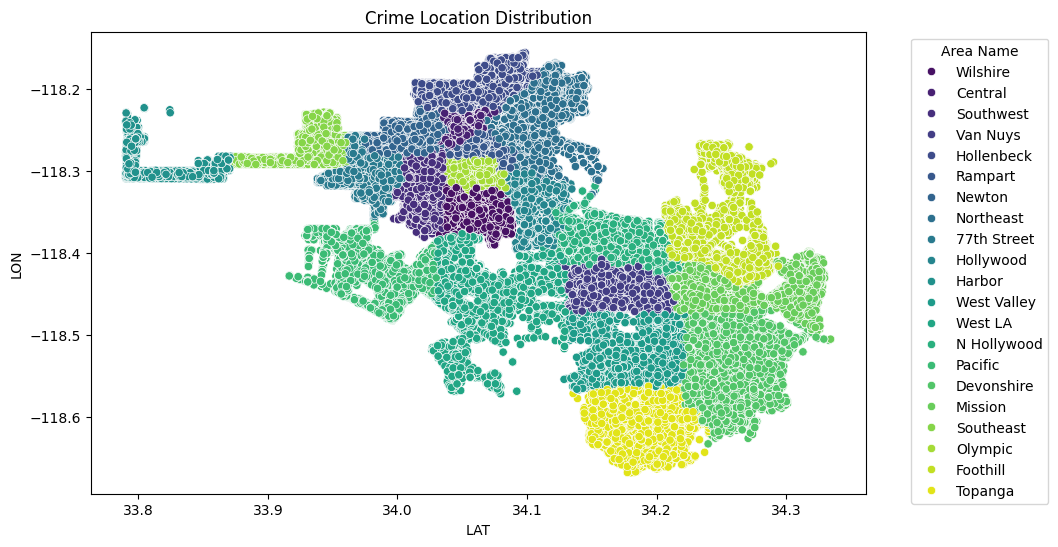

In [29]:
pos_crime = crime_2020_2023[['LAT','LON','AREA NAME']]
# Filtra i dati in base ai quartili per rimuovere i valori anomali
q1, q2, q3 = pos_crime['LAT'].quantile([0.25, 0.5, 0.75]).tolist()
pos_data = pos_crime[(pos_crime['LAT'] >= (q1 - 1.5 * (q3 - q1))) &
                     (pos_crime['LAT'] <= (q3 + 1.5 * (q3 - q1)))]

# Controlla se ci sono dati nel set dopo il filtro
print(f"Numero di dati dopo il filtro: {len(pos_data)}")
print(pos_data.head())

# Se ci sono dati, procediamo con la visualizzazione
if len(pos_data) > 0:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pos_data, x='LAT', y='LON', hue='AREA NAME', palette='viridis')
    plt.title('Crime Location Distribution')
    plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("Nessun dato disponibile dopo il filtro. Potresti voler controllare i valori di latitudine e longitudine.")


## Analisi temporale

In [ ]:
crime['Hour'] = crime['TIME OCC'] // 100 # New "Hour" column
time_increments = [0, 6, 12, 18, 24] # Bins grouped by hour of the day <1-6am, 7am-12pm, 1-6pm, 7pm-12am>
time_labels = [ 'Morning', 'Afternoon', 'Evening', 'Night']
crime['Time of Day'] = pd.cut(crime['Hour'], bins = time_increments, labels = time_labels, right=True)
# Seperating times into bins.

time_distribution = crime['Time of Day'].value_counts().reindex(time_labels)

plt.figure(figsize = (15, 9))
colors = sns.color_palette('coolwarm', len(time_distribution))

bars = plt.bar(time_distribution.index, time_distribution.values, color = colors, linewidth=2, alpha=0.85)

plt.title('Distribuzione dei crimini durante la giornata', fontsize = 20, fontweight = 'bold')
plt.xlabel('Ora del giorno', fontsize = 15, fontweight = 'bold')
plt.ylabel('Numero di crimini', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

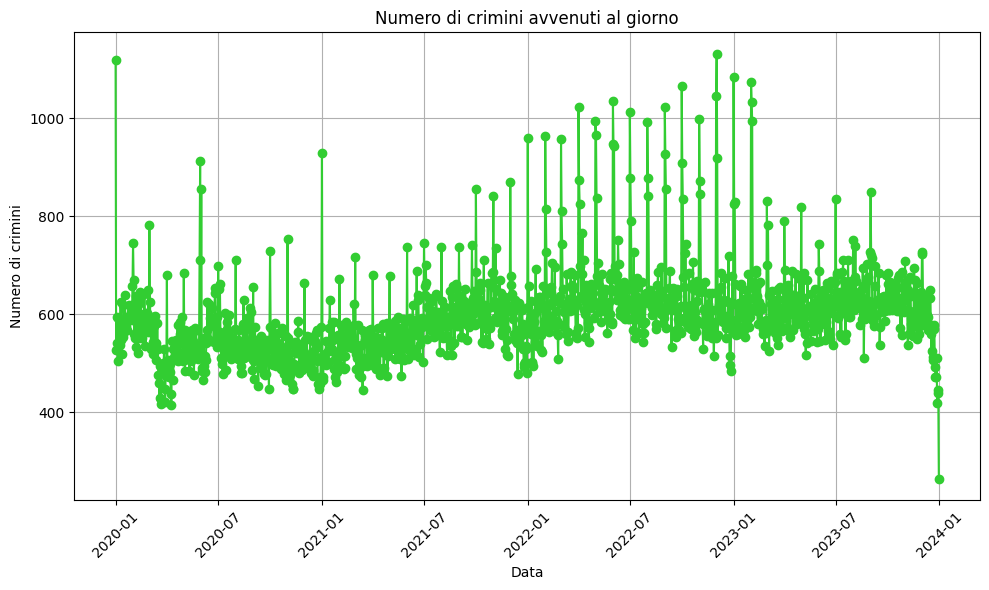

In [30]:
# Contiamo il numero di crimini per ogni giorno
crime_counts = crime_2020_2023['DATE OCC'].value_counts().sort_index()

# Creiamo il grafico
plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-', color='#32CD32')
plt.title('Numero di crimini avvenuti al giorno')
plt.xlabel('Data')
plt.ylabel('Numero di crimini')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostriamo il grafico
plt.show()

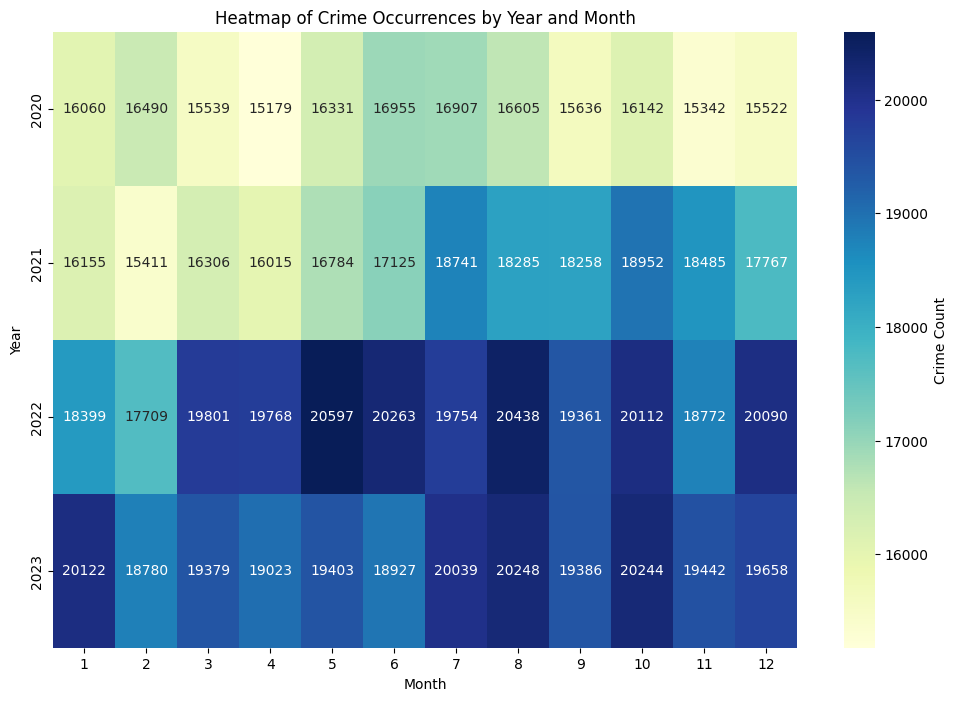

In [16]:
# Extract month and year for analysis
crime_2020_2023['Month'] = crime_2020_2023['Date Rptd'].dt.month
crime_2020_2023['Year'] = crime_2020_2023['Date Rptd'].dt.year

# Create a pivot table to aggregate crime count by year and month
crime_heatmap_data = crime_2020_2023.groupby(['Year', 'Month']).size().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Crime Count'})
plt.title('Heatmap of Crime Occurrences by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [17]:
# Bar chart for crime occurrences per year
year_crime_data = crime_2020_2023.groupby('Year').size().reset_index(name='Crime Count')
bar_fig = px.bar(year_crime_data, x='Year', y='Crime Count', title='Crime Count per Year')

# Line chart for crime occurrences over time
time_series_data = crime_2020_2023.groupby('Date Rptd').size().reset_index(name='Crime Count')
line_fig = px.line(time_series_data, x='Date Rptd', y='Crime Count', title='Crime Count Over Time')

# Show both charts in one dashboard
bar_fig.show()
line_fig.show()

In [33]:
# Raggruppa per anno per visualizzare i crimini annuali
annual_crime_data = crime_2020_2023.groupby('Year').size().reset_index(name='Crime Count')

# Visualizza i crimini annuali
fig = px.line(annual_crime_data, x='Year', y='Crime Count', title='Annual Crime Trend')
fig.show()


In [21]:
# Aggiungi una colonna per il mese in formato numerico per il confronto
monthly_comparison = crime_2020_2023.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

# Visualizza il confronto stagionale anno per anno
fig = px.line(monthly_comparison, x='Month', y='Crime Count', color='Year', title='Confronto stagionale della criminalità per anno 2020-2023')
fig.update_xaxes(tickmode='array', tickvals=monthly_comparison['Month'])
fig.show()


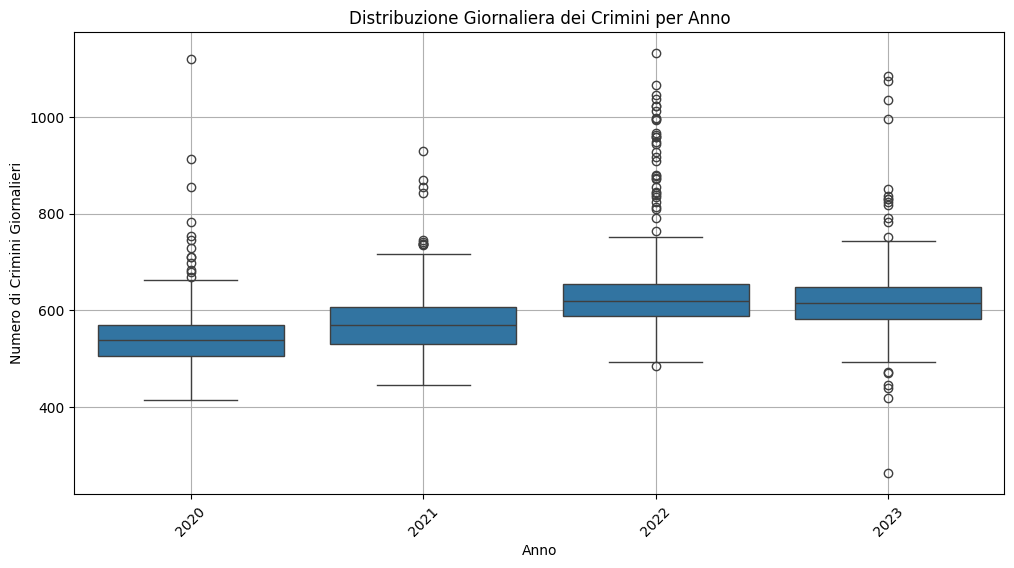

In [36]:
# Creazione di una colonna "Year" per l'anno
crime_2020_2023['Year'] = crime_2020_2023['DATE OCC'].dt.year

# Conta il numero di crimini per giorno
daily_crime_counts = crime_2020_2023.groupby(['Year', 'DATE OCC']).size().reset_index(name='Crime Count')

# Creazione del boxplot per la distribuzione dei crimini per anno
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=daily_crime_counts['Year'], y=daily_crime_counts['Crime Count'])

# Impostazione delle etichette e del titolo
ax.set_xlabel('Anno')
ax.set_ylabel('Numero di Crimini Giornalieri')
ax.set_title('Distribuzione Giornaliera dei Crimini per Anno')
plt.xticks(rotation=45)  # Ruota le etichette degli anni se necessario
plt.grid(True)

# Mostrare il grafico
plt.show()

# Trend forecasting

## Pre-elaborazione dei dati

In [19]:
# 1. Test di Dickey-Fuller per verificare la stazionarietà
# Creiamo una serie temporale con il numero di crimini per giorno
crime_per_day = crime_2020_2023.groupby(crime['DATE OCC']).size()
result = adfuller(crime_per_day)

print(f"Statistiche ADF: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Numero di lags usati: {result[2]}")
print(f"Numero di osservazioni: {result[3]}")
print(f"Valori critici:")
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# Se p-value < 0.05, la serie è stazionaria
d = 0  # Inizializziamo d
if result[1] > 0.05:
    d += 1  # Incrementa d

    # 2. Applicare la differenza prima
    crime_per_day_diff = crime_per_day.diff().dropna()

    # Visualizzare la serie differenziata
    plt.figure(figsize=(10, 6))
    crime_per_day_diff.plot()
    plt.title("Serie Temporale Differenziata")
    plt.xlabel("Data")
    plt.ylabel("Numero di Crimini (Differenza)")
    plt.grid(True)
    plt.show()

    # 3. Verifica della stazionarietà sulla serie differenziata
    result_diff = adfuller(crime_per_day_diff)
    print(f"Statistiche ADF (Differenziata): {result_diff[0]}")
    print(f"P-value (Differenziata): {result_diff[1]}")

    if result_diff[1] < 0.05:
        print(f"La serie differenziata è stazionaria. Il valore di d è {d}.")
    else:
        print(f"La serie differenziata non è stazionaria. Il valore di d è {d}.")
else:
    print("La serie è già stazionaria.")
    print(f"Il valore di d è {d}.")

Statistiche ADF: -3.8266508924514913
P-value: 0.0026461136388890453
Numero di lags usati: 22
Numero di osservazioni: 1438
Valori critici:
	1%: -3.435
	5%: -2.864
	10%: -2.568
La serie è già stazionaria.
Il valore di d è 0.


<Figure size 1200x600 with 0 Axes>

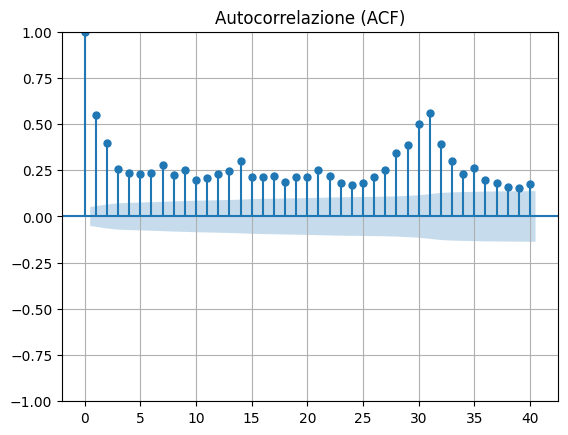

<Figure size 1200x600 with 0 Axes>

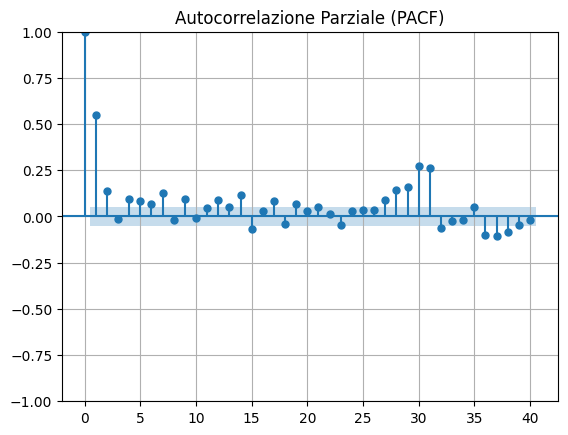

In [38]:
# Grafico ACF (per q)
plt.figure(figsize=(12, 6))
plot_acf(crime_per_day, lags=40, alpha=0.05)  # alpha=0.05 per includere le linee critiche
plt.title('Autocorrelazione (ACF)')
plt.grid(True)
plt.show()

# Grafico PACF (per p)
plt.figure(figsize=(12, 6))
plot_pacf(crime_per_day, lags=40, alpha=0.05)  # alpha=0.05 per includere le linee critiche
plt.title('Autocorrelazione Parziale (PACF)')
plt.grid(True)
plt.show()

### Previsione con ARIMA

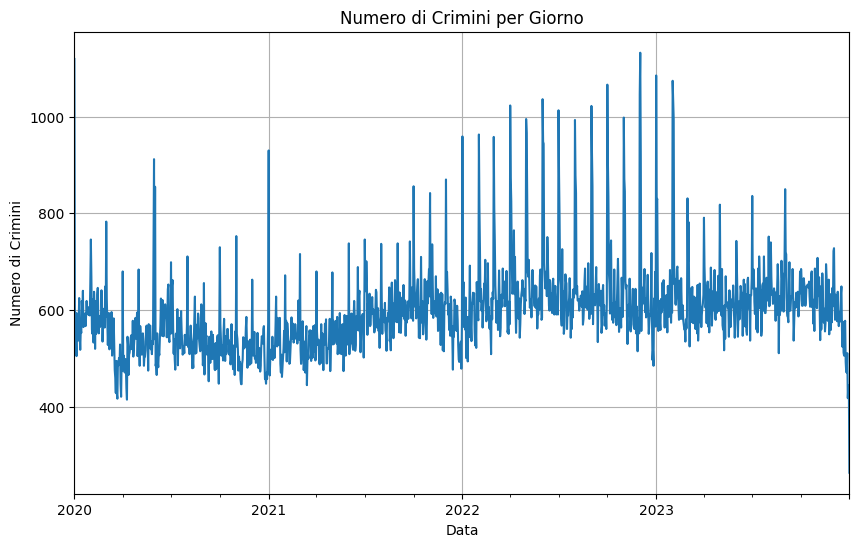

                                       SARIMAX Results                                       
Dep. Variable:                                     y   No. Observations:                 1168
Model:             ARIMA(1, 0, 1)x(2, 0, [1, 2], 30)   Log Likelihood               -6663.174
Date:                               Tue, 11 Feb 2025   AIC                          13342.347
Time:                                       12:45:20   BIC                          13382.851
Sample:                                   01-01-2020   HQIC                         13357.625
                                        - 03-13-2023                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        590.8479      9.426     62.680      0.000     572.373     609.323
ar.L1      

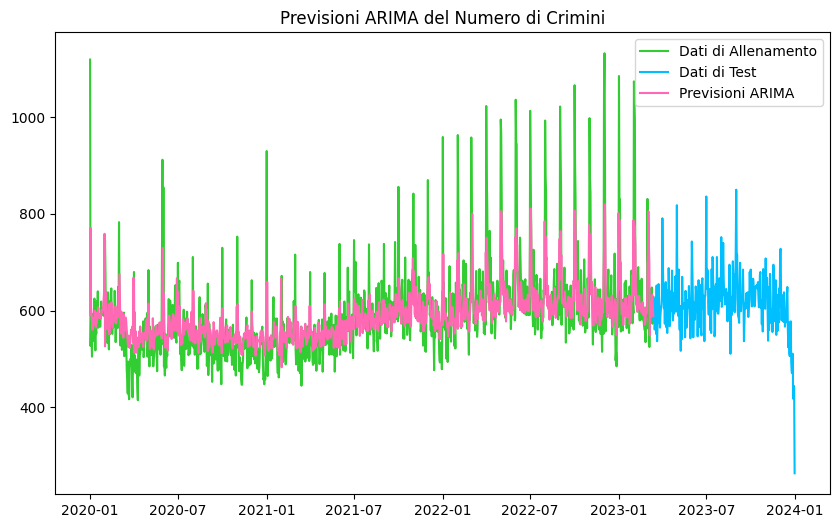

In [ ]:
# Visualizziamo la serie temporale
plt.figure(figsize=(10, 6))
crime_per_day.plot()
plt.title("Numero di Crimini per Giorno")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Prepariamo la serie temporale per ARIMA
crime_per_day = crime_per_day.asfreq('D')  # Frequenza giornaliera, puoi anche usare 'W' o 'M' se preferisci settimane o mesi
crime_per_day = crime_per_day.fillna(0)  # Gestiamo i valori nulli

# Dividiamo in dati di allenamento e di test (ad esempio, 80% allenamento, 20% test)
cpd = len(crime_per_day)
train_size = int(cpd * 0.8)
train = crime_per_day[:train_size]

# Costruzione e addestramento del modello ARIMA #fare anche senza il seasonal_order perchè esce un grafico più accurato
model = ARIMA(train, order=(1, 0,1), seasonal_order=(2,0,2,30))  # (p, d, q) dove p è il numero di lag, d è la differenza, q è il numero di term
# ax = plt.gca()
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(crime_per_day[train_size-1:]))

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(crime_per_day[:train_size], color='limegreen', label='Dati di Allenamento')
plt.plot(crime_per_day[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(model_fit.fittedvalues, color='hotpink', label='Previsioni ARIMA')
plt.title("Previsioni ARIMA del Numero di Crimini")
# plt.xlabel("Data")
# plt.ylabel("Numero di Crimini")
plt.legend()

print(model_fit.summary())
print("Il numero degli elementi del periodo considerato è: "+str(cpd))
print("L'indice dell'ultimo elemento del training set è: "+str(train_size))
# Valutazione della previsione (errori)

mse = mean_squared_error(crime_per_day[train_size-1:], forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")


In [40]:
print(crime_2020_2023[crime_2020_2023['DATE OCC'].dt.year > 2023])

Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Part 1-2, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Cd, Premis Desc, Weapon Used Cd, Weapon Desc, Status, Status Desc, Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4, LOCATION, Cross Street, LAT, LON, Criminal Activity Duration, Active Status, Month, Year]
Index: []

[0 rows x 32 columns]


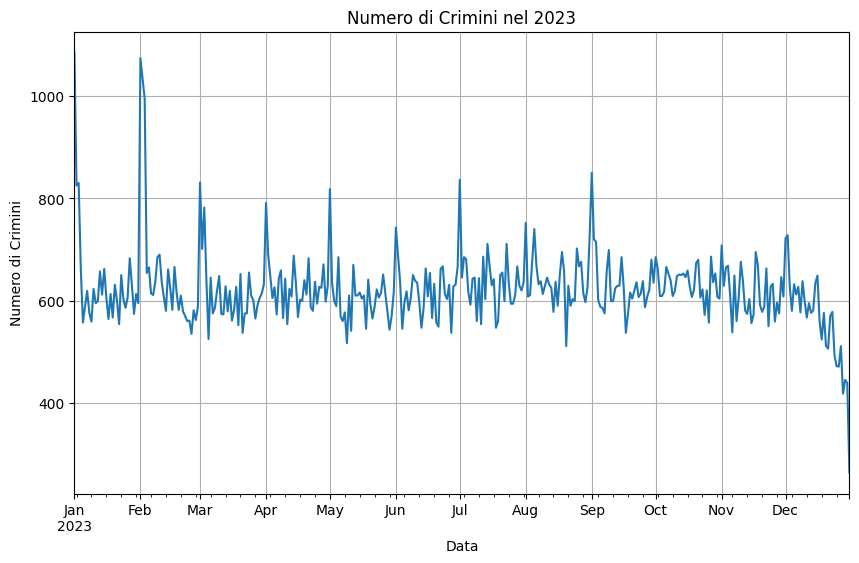

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



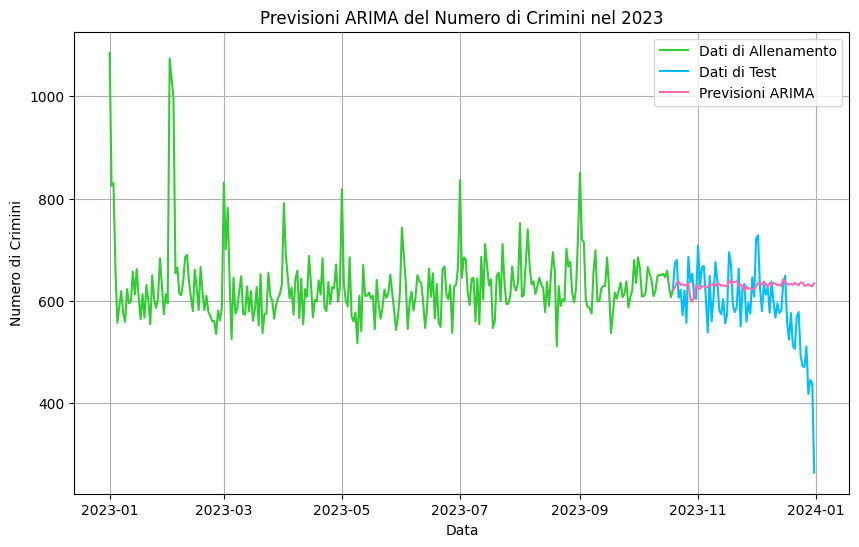

Errore Quadratico Medio (MSE): 7118.908853924124
Media giornaliera dei crimini: 595.97
Errore Quadratico Medio (RMSE): 84.37


In [41]:
# Assicurati che l'indice sia di tipo datetime
crime_per_day.index = pd.to_datetime(crime_per_day.index)

# Selezioniamo i dati per l'anno specifico (ad esempio, 2021)
train_year = 2023
train_data = crime_per_day.loc[str(train_year)]

# Visualizziamo i dati selezionati per l'anno specifico
plt.figure(figsize=(10, 6))
train_data.plot()
plt.title(f"Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Dividiamo i dati in allenamento (80%) e test (20%)
train_size = int(len(train_data) * 0.8)
train = train_data[:train_size]
test = train_data[train_size-1:]

# Costruzione e Addestramento del Modello ARIMA
model = ARIMA(train, order=(2, 0, 2), seasonal_order=(2,0,2,90))  # (p, d, q)
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(test))

# Ottieni l'indice del test per allineare le previsioni
forecast_index = train_data.index[train_size-1:]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_data[:train_size], color='limegreen', label='Dati di Allenamento')
plt.plot(train_data[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(forecast_index, forecast, color='hotpink', label='Previsioni ARIMA')
plt.title(f"Previsioni ARIMA del Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

# Calcola l'errore quadratico medio

mse = mean_squared_error(test, forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")
# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day.mean()

# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")

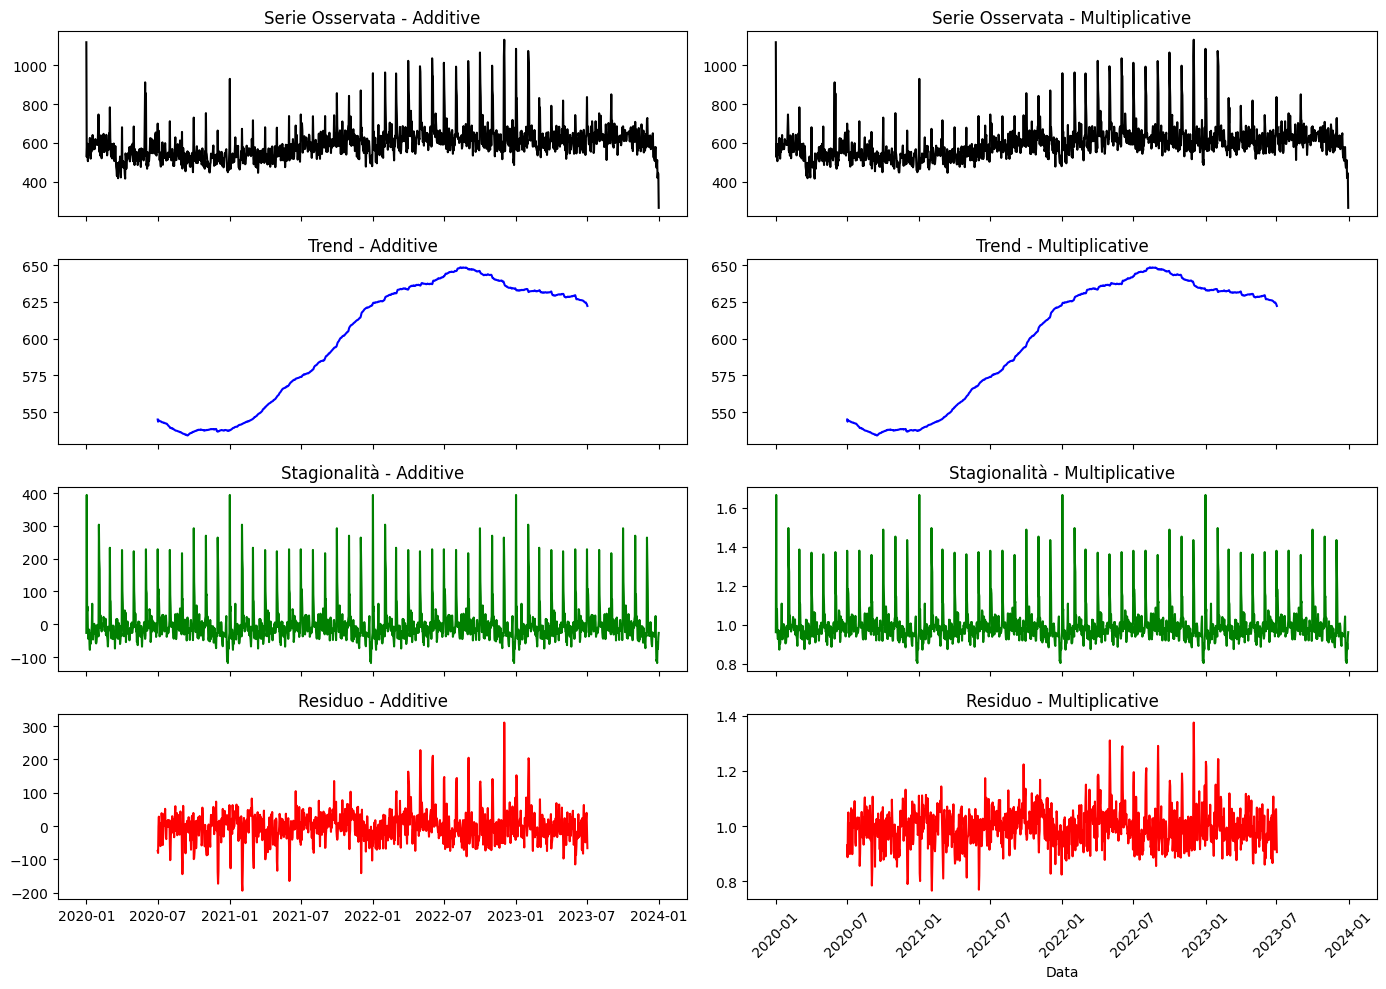

In [42]:


# Decomposizione Additiva
decomp_add = seasonal_decompose(crime_per_day, model='additive', period=365)

# Decomposizione Moltiplicativa
decomp_mult = seasonal_decompose(crime_per_day, model='multiplicative', period=365)

# Creiamo i grafici
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

# Funzione per disegnare la decomposizione in una colonna
def plot_decomposition(decomp, col, title):
    axes[0][col].plot(decomp.observed, color='black')
    axes[0][col].set_title(f'Serie Osservata - {title}')

    axes[1][col].plot(decomp.trend, color='blue')
    axes[1][col].set_title(f'Trend - {title}')

    axes[2][col].plot(decomp.seasonal, color='green')
    axes[2][col].set_title(f'Stagionalità - {title}')

    axes[3][col].plot(decomp.resid, color='red')
    axes[3][col].set_title(f'Residuo - {title}')

# Disegniamo le decomposizioni
plot_decomposition(decomp_add, 0, "Additive")
plot_decomposition(decomp_mult, 1, "Multiplicative")

# Miglioriamo la leggibilità
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

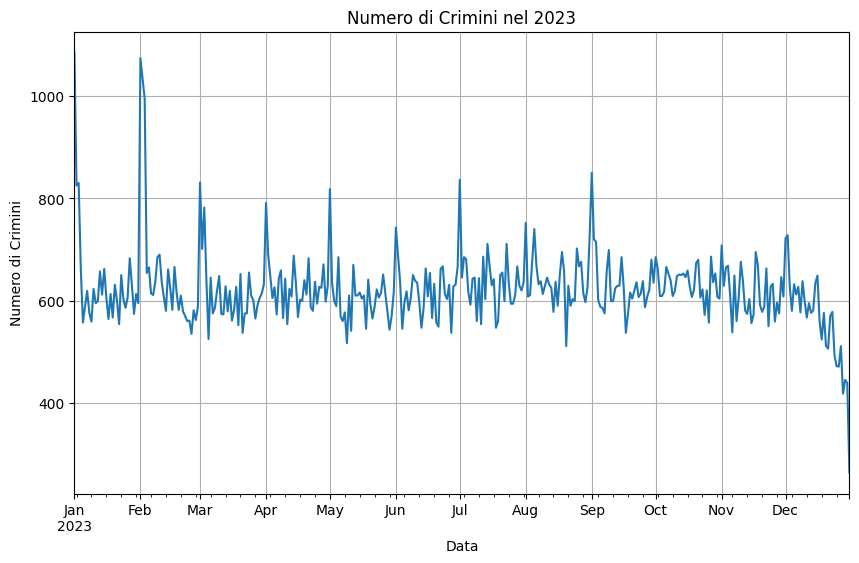

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



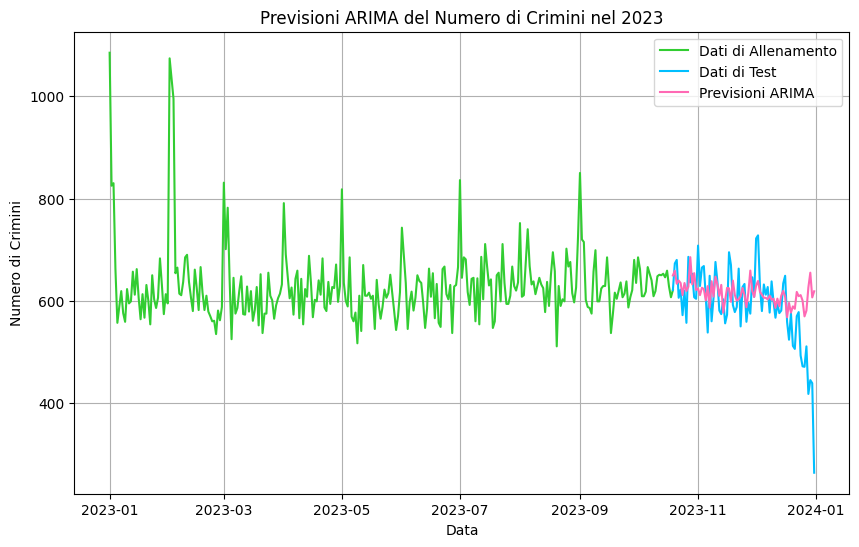

Errore Quadratico Medio (MSE): 5682.535906831929
Media giornaliera dei crimini: 595.97
Errore Quadratico Medio (RMSE): 75.38


In [ ]:
# Assicurati che l'indice sia di tipo datetime
crime_per_day.index = pd.to_datetime(crime_per_day.index)

# Selezioniamo i dati per l'anno specifico (ad esempio, 2021)
train_year = 2023
train_data = crime_per_day.loc[str(train_year)]

# Visualizziamo i dati selezionati per l'anno specifico
plt.figure(figsize=(10, 6))
train_data.plot()
plt.title(f"Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.grid(True)
plt.show()

# Dividiamo i dati in allenamento (80%) e test (20%)
train_size = int(len(train_data) * 0.8)
train = train_data[:train_size]
test = train_data[train_size-1:]

# Costruzione e Addestramento del Modello ARIMA
model = SARIMAX(train, order=(2, 0, 2), seasonal_order=(2,0,2,60))  # (p, d, q)
model_fit = model.fit()

# Previsione dei crimini nel periodo di test
forecast = model_fit.forecast(steps=len(test))

# Ottieni l'indice del test per allineare le previsioni
forecast_index = train_data.index[train_size-1:]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(train_data[:train_size], color='forestgreen', label='Dati di Allenamento')
plt.plot(train_data[train_size-1:], color='deepskyblue', label='Dati di Test')
plt.plot(forecast_index, forecast, color='red', label='Previsioni ARIMA')
plt.title(f"Previsioni ARIMA del Numero di Crimini nel {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

# Calcola l'errore quadratico medio

mse = mean_squared_error(test, forecast)
print(f"Errore Quadratico Medio (MSE): {mse}")
# Calcolare la media giornaliera dei crimini
mean_crime_per_day = crime_per_day.mean()

# Stampare il valore medio giornaliero
print(f"Media giornaliera dei crimini: {mean_crime_per_day:.2f}")
# Calcolare l'RMSE
rmse = np.sqrt(mse)
print(f"Errore Quadratico Medio (RMSE): {rmse:.2f}")

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserW

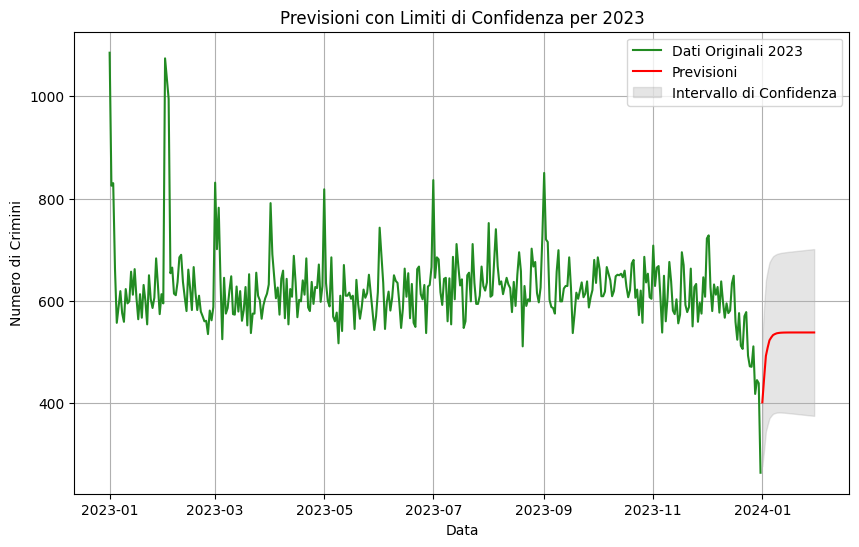

In [20]:
# Passo 1: Assicurati che l'indice sia di tipo datetime
crime_per_day.index = pd.to_datetime(crime_per_day.index)

# Passo 2: Seleziona i dati per l'anno specifico
train_year = 2023
train_data = crime_per_day.loc[crime_per_day.index.year == train_year]

# Controlla che il dataset non sia vuoto
if train_data.empty:
    raise ValueError(f"Nessun dato disponibile per l'anno {train_year}")

# Passo 3: Costruzione e Addestramento del Modello ARIMA
model = ARIMA(train_data, order=(2, 1, 2))  # p, d=1, q per gestire trend
model_fit = model.fit()

# Passo 4: Previsione futura per 30 giorni
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Passo 5: Ottieni i valori previsti e i limiti di confidenza
forecast_values = forecast_result.predicted_mean
confidence_int = forecast_result.conf_int()

# Passo 6: Crea un asse temporale corretto per la previsione
forecast_dates = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Passo 7: Visualizza il risultato
plt.figure(figsize=(10, 6))
plt.plot(train_data, label=f"Dati Originali {train_year}",color='forestgreen')
plt.plot(forecast_dates, forecast_values, color='red', label='Previsioni')
plt.fill_between(forecast_dates, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='gray', alpha=0.2, label="Intervallo di Confidenza")

plt.title(f"Previsioni con Limiti di Confidenza per {train_year}")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserW

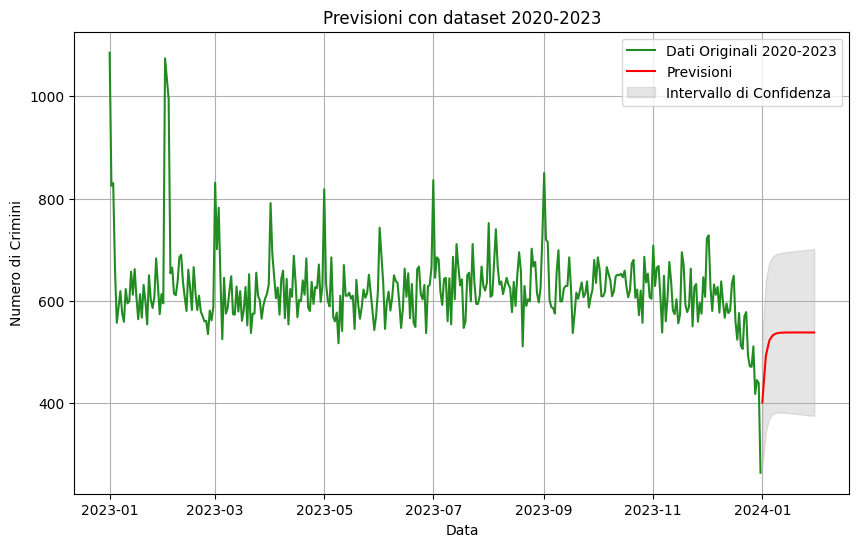

In [24]:
# Passo 1: Assicurati che l'indice sia di tipo datetime
crime_per_day.index = pd.to_datetime(crime_per_day.index)

# Prepariamo la serie temporale per ARIMA
crime_per_day = crime_per_day.asfreq('D')  # Frequenza giornaliera, puoi anche usare 'W' o 'M' se preferisci settimane o mesi
crime_per_day = crime_per_day.fillna(0)  # Gestiamo i valori nulli

# Dividiamo in dati di allenamento e di test (ad esempio, 80% allenamento, 20% test)
cpd = len(crime_per_day)
train_size = int(cpd * 0.8)
train = crime_per_day[:train_size]

# Passo 3: Costruzione e Addestramento del Modello ARIMA
model = ARIMA(train_data, order=(2, 1, 2))  # p, d=1, q per gestire trend
model_fit = model.fit()

# Passo 4: Previsione futura per 30 giorni
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Passo 5: Ottieni i valori previsti e i limiti di confidenza
forecast_values = forecast_result.predicted_mean
confidence_int = forecast_result.conf_int()

# Passo 6: Crea un asse temporale corretto per la previsione
forecast_dates = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Passo 7: Visualizza il risultato
plt.figure(figsize=(10, 6))
plt.plot(train_data, label=f"Dati Originali 2020-2023",color='forestgreen')
plt.plot(forecast_dates, forecast_values, color='red', label='Previsioni')
plt.fill_between(forecast_dates, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='gray', alpha=0.2, label="Intervallo di Confidenza")

plt.title(f"Previsioni con dataset 2020-2023")
plt.xlabel("Data")
plt.ylabel("Numero di Crimini")
plt.legend()
plt.grid(True)
plt.show()